In [1]:
#Importing the warnings.

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Numpy and Pandas Package and other Ipython modules for dispaly interactively.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [3]:
# Read uber data as uber

uber = pd.read_csv("C:/Users/134466/Documents/GitHub/PGDSS/uber request data.csv")


In [4]:
## Analayse the shape,column details of uber data frame.
uber.shape
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


In [5]:
## CLEANSING


#Converting the Requesting timestamp and drop timestamp into 1 form 

uber['Request timestamp'] = uber['Request timestamp'].str.replace('/','-')
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('/','-')
uber['Drop timestamp'] = uber['Drop timestamp'].str.replace('NA','0')

In [6]:
##Converting the Requesting timestamp and drop timestamp into date format using .to_datetime()

uber['Request timestamp'] = pd.to_datetime(uber['Request timestamp'])
uber['Drop timestamp'] = pd.to_datetime(uber['Drop timestamp']) 

In [7]:
##Extracting date out of Drop timestamp into new column "Drop_Date"

uber['Drop_Date'] = uber['Drop timestamp'].dt.date

In [23]:
##Extracting date out of Request timestamp into new column "request_date"

uber['request_date'] = uber['Request timestamp'].dt.date

In [24]:
##Extracting time out of Request timestamp and Drop timestamp.
uber['request_time'] = uber['Request timestamp'].dt.hour
uber['Drop_time'] = uber['Drop timestamp'].dt.hour

In [11]:
# Allocating Sessions as per hours of the day

uber = uber.assign(session=pd.cut(uber['Request timestamp'].dt.hour,[0,4,8,12,16,20,23],
                    labels=['Night','Early Morning','Morning','Afternoon','Evening','Late evening']))

In [12]:
### Visually identify the most pressing problems for Uber. 

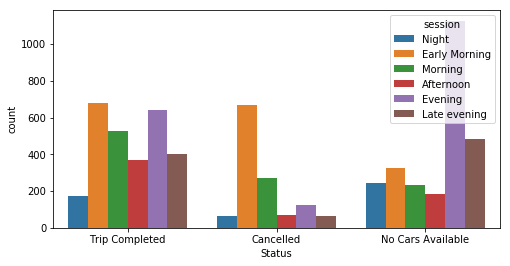

In [35]:
plt.figure(figsize=(8, 4))
sns.countplot(x="Status", hue = "session" ,data=uber)
plt.show()


In [ ]:
# Creating a seperate Data frame for all the Status=No Cars Available

NocarsAvaialable = uber[uber['Status']=='No Cars Available']

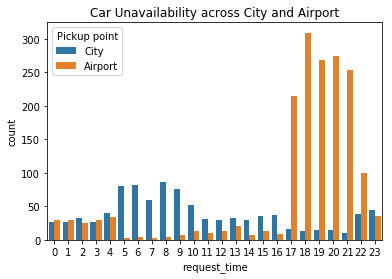

In [43]:
##Displaying the unavailability of cars across City and Airport throughout the Day.

plt.title('Car Unavailability across City and Airport')
sns.countplot(x="request_time",hue ='Pickup point',data = NocarsAvaialable)
plt.show()

In [53]:
## Creating a seperate Data frame for all the Status=No Cars Available

Trips_Cancelled = uber[uber['Status']=='Cancelled']

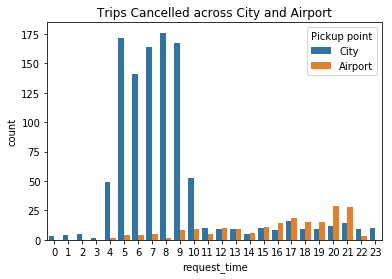

In [51]:
##Displaying the unavailability of cars across City and Airport throughout the Day.

plt.title('Trips Cancelled across City and Airport')
sns.countplot(x="request_time",hue ='Pickup point',data = Trips_Cancelled)
plt.show()

In [ ]:
### INFERENCE: 2 Most Pressing problem for Uber:

1-Car Unavailability in the evening peaking at 6PM at the airport.

2-Trips Getting cancelled in the city precisely 5AM - 9AM in the City.

In [57]:
## supply = Trip completed
##  demand = All the requests made
 
#Creating a new Dataframe     
Trip_Completed = uber[uber['Status']=='Trip Completed']

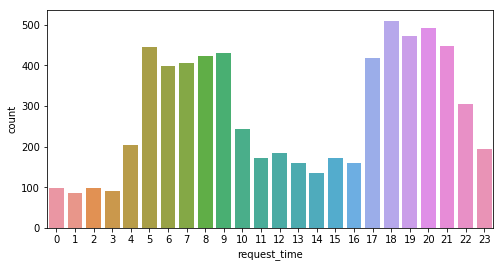

In [64]:
### Demand of Cabs

plt.figure(figsize=(8,4))
sns.countplot(x="request_time" ,data= uber)
plt.show()

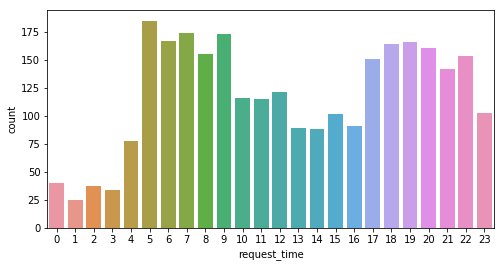

In [63]:
### Actual Supply of Cabs

plt.figure(figsize=(8,4))
sns.countplot(x="request_time" ,data= Trip_Completed)
plt.show()

In [ ]:
### INFERENCE 

### Maximum Variation (Gap) is at 6-0 Clock in the Evening:344

#Number of Cars required(Demand) = 508
#Number of Cars Supplied(Supply) = 164

## Second Highest Variation (Gap) is at 8PM :331

#where :
##Number of Cars required(Demand):492
##Number of Cars supplied(Supply):161

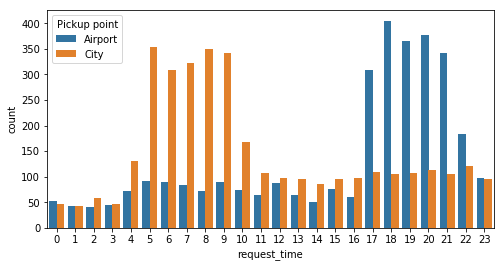

In [66]:
### Demand of Cabs across City and Airport

plt.figure(figsize=(8, 4))
sns.countplot(x="request_time",hue = "Pickup point",data= uber)
plt.show()

In [ ]:
### Gap at Airport at 6 PM (324) and 8 PM (308)  

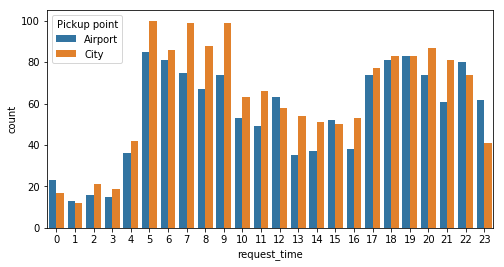

In [67]:
###Actual Supply of Cars across city and Airport

plt.figure(figsize=(8, 4))
sns.countplot(x="request_time",hue = "Pickup point" ,data= Trip_Completed)
plt.show()

In [ ]:
### INFERENCE :

# Gap at Airport at 6 PM (324) and 8 PM (308)  are the highest and second highest variation in numbers.